Bike sharing model evaluation
---

Solution: Load train/test sets
---

> **Exercise**: Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `users` columns. Plot the data points.

In [1]:
import pandas as pd
import os

# Load data sets
train_df = pd.read_csv(os.path.join('data', 'bike-train.csv'))
test_df = pd.read_csv(os.path.join('data', 'bike-test.csv'))

# Create x/y Numpy arrays
x_tr = train_df.temp.values
y_tr = train_df.users.values

x_te = test_df.temp.values
y_te = test_df.users.values

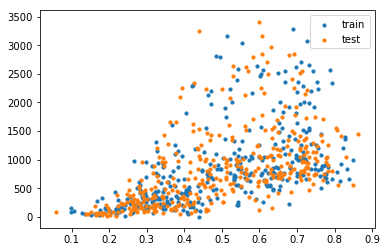

In [6]:
# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_tr, y_tr, label='train', s=10)
plt.scatter(x_te, y_te, label='test', s=10)
plt.legend()
plt.show()

Solution: Fit and compare different models
---

> **Exercise**: (A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [8]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE linear regression: 408.823
MAE polyfit(deg=3): 403.786
MAE Huber: 383.694


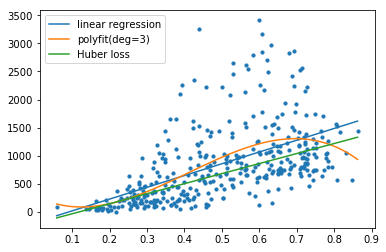

In [9]:
import numpy as np

# (A) Test different models
# * Linear regression
coefs_lr = np.polyfit(x_tr, y_tr, deg=1) # Fit to train data
y_pred_lr = np.polyval(coefs_lr, x_te) # Predictions for test data points
mae_lr = MAE(y_te, y_pred_lr) # MAE of predictions
# Print performance on test set
print('MAE linear regression: {:.3f}'.format(mae_lr))

# * Polyfit with degree 3
coefs_poly3 = np.polyfit(x_tr, y_tr, deg=3) # Fit to train data
y_pred_poly3 = np.polyval(coefs_poly3, x_te) # Predictions for test data points
mae_poly3 = MAE(y_te, y_pred_poly3) # MAE of predictions
print('MAE polyfit(deg=3): {:.3f}'.format(mae_poly3))

# * Huber loss
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.1) # Create object
huber.fit(x_tr[:, np.newaxis], y_tr) # Fit it to train data
y_pred_huber = huber.predict(x_te[:, np.newaxis]) # Predictions for test data points
mae_huber = MAE(y_te, y_pred_huber) # MAE of predictions
print('MAE Huber: {:.3f}'.format(mae_huber))

# Plot the prediction curves
# Generate a hundred points
x_values = np.linspace(min(x_te), max(x_te), num=100)

# and the predictions
y_values_lr = np.polyval(coefs_lr, x_values)
y_values_poly3 = np.polyval(coefs_poly3, x_values)
y_values_huber = huber.predict(x_values[:, np.newaxis])

# Plot them
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label='linear regression')
plt.plot(x_values, y_values_poly3, label='polyfit(deg=3)')
plt.plot(x_values, y_values_huber, label='Huber loss')
plt.legend()
plt.show()

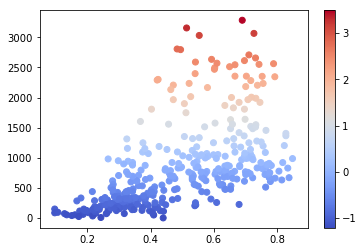

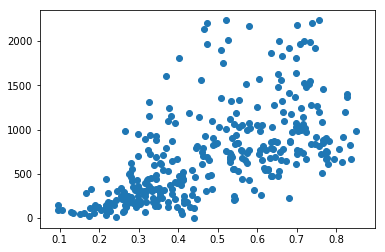

In [10]:
# (B) Remove outliers
# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)

# Plot them
plt.scatter(x_tr, y_tr, c=z_scores, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

# Detect "extreme" data points
# 2 standard deviations away form the mean
idx = np.abs(z_scores) < 2 

# Remove them
x_tr2, y_tr2 = x_tr[idx], y_tr[idx]

# Plot the remaining points
plt.scatter(x_tr2, y_tr2)
plt.show()

MAE linear regression 2: 390.481
MAE polyfit(deg=3) 2: 381.188


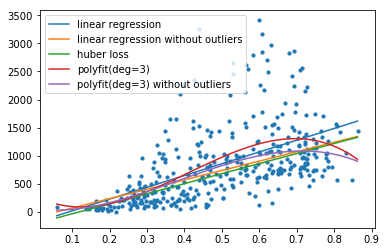

In [11]:
# Linear regression without outliers
coefs_lr2 = np.polyfit(x_tr2, y_tr2, deg=1) # Fit to train data without outliers
y_pred_lr2 = np.polyval(coefs_lr2, x_te) # Predictions for test data points
mae_lr2 = MAE(y_te, y_pred_lr2) # MAE of predictions
print('MAE linear regression 2: {:.3f}'.format(mae_lr2))

# Polyfit with degree 3
coefs_poly3_2 = np.polyfit(x_tr2, y_tr2, deg=3) # Fit to train data without outliers
y_pred_poly3_2 = np.polyval(coefs_poly3_2, x_te) # Predictions for test data points
mae_poly3_2 = MAE(y_te, y_pred_poly3_2) # MAE of predictions
print('MAE polyfit(deg=3) 2: {:.3f}'.format(mae_poly3_2))

# Predictions for the hundred x_values
y_values_lr2 = np.polyval(coefs_lr2, x_values)
y_values_poly3_2 = np.polyval(coefs_poly3_2, x_values)

# Plot all models
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label='linear regression')
plt.plot(x_values, y_values_lr2, label='linear regression without outliers')
plt.plot(x_values, y_values_huber, label='huber loss')
plt.plot(x_values, y_values_poly3, label='polyfit(deg=3)')
plt.plot(x_values, y_values_poly3_2, label='polyfit(deg=3) without outliers')
plt.legend()
plt.show()

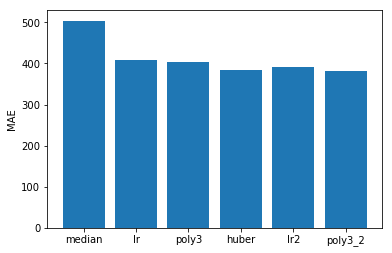

In [12]:
# (C) Final comparison
# Baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Bar plot
mae_values = [mae_baseline, mae_lr, mae_poly3, mae_huber, mae_lr2, mae_poly3_2]
titles = ['median', 'lr', 'poly3', 'huber', 'lr2', 'poly3_2']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel('MAE')
plt.show()